# **Wikipedia Simplifier : Assignment 3**
---
> **By Team 4** :
*   Pratham Jain
*   Rashmi G R
*   Rishav Bikarwar

---
> **Mentors** :
*   Ananya Gupta
*   Rishabh Dugaye

---


## **AND Boolean Function** using **Neural Network**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def initialize_parameters(layer_dims):
    """Initialize the parameters"""

    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.05
        parameters['b'+str(l)] = np.random.randn(layer_dims[l], 1) * 0.05
    
    return parameters

In [3]:
def relu(Z):
    """ReLu activation function"""
    return np.maximum(Z, 0)

def sigmoid(Z):
    """Sigmoid activation function"""
    return 1/(1 + np.exp(-Z))

In [4]:
def forward_prop(X, parameters):
    """Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation"""

    caches = {}
    caches['A0'] = X
    A = X
    L = len(parameters) // 2

    for l in range(1, L):
        Z = np.dot(parameters['W'+str(l)], caches['A'+str(l-1)]) + parameters['b'+str(l)]
        A = relu(Z)
        caches['Z'+str(l)] = Z
        caches['A'+str(l)] = A
    
    caches['Z'+str(L)] = np.dot(parameters['W'+str(L)], caches['A'+str(L-1)]) + parameters['b'+str(L)]
    caches['A'+str(L)] = sigmoid(caches['Z'+str(L)])

    return caches['A'+str(L)], caches

In [5]:
def compute_cost(AL, Y):
    """Implement the cost function"""
    
    m = Y.shape[1]
    cost = (-1/m) * np.sum(Y*np.log(AL) + (1-Y)*np.log(1-AL))
    
    return np.squeeze(cost)

In [6]:
def backward_prop(AL, Y, caches, parameters):
    """Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group"""

    grads = {}
    L = len(parameters) // 2
    m = Y.shape[1]
    Y = Y.reshape(AL.shape)

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Lth layer: (SIGMOID -> LINEAR) gradients.
    dZ = dAL * AL * (1 - AL)
    grads["dA" + str(L-1)] = np.dot(parameters['W'+str(L)].T, dZ)
    grads["dW" + str(L)] = (1/m) * np.dot(dZ, caches['A'+str(L-1)].T)
    grads["db" + str(L)] = (1/m) * np.sum(dZ, axis=1, keepdims=True)

    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        dZ = grads["dA" + str(l+1)] * (caches['Z' + str(l+1)] >= 0)
        grads["dA" + str(l)] = np.dot(parameters['W'+str(l+1)].T, dZ)
        grads["dW" + str(l+1)] = (1/m) * np.dot(dZ, caches['A'+str(l)].T)
        grads["db" + str(l+1)] = (1/m) * np.sum(dZ, axis=1, keepdims=True)

    return grads

In [7]:
def update_parameters(params, grads, learning_rate):
    """Update parameters using gradient descent"""

    parameters = params.copy()
    L = len(parameters) // 2

    for l in range(1, L):
        parameters['W' + str(l)] = parameters['W' + str(l)] - learning_rate * grads['dW' + str(l)]
        parameters['b' + str(l)] = parameters['b' + str(l)] - learning_rate * grads['db' + str(l)]

    return parameters

In [8]:
def predict(X, parameters):
    AL, temp = forward_prop(X, parameters)
    Y_pred = (AL > 0.5) * 1
    return Y_pred

In [9]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID"""

    costs = []
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):

        AL, caches = forward_prop(X, parameters)
        cost = compute_cost(AL, Y)
        grads = backward_prop(AL, Y, caches, parameters)
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    model = {}
    model['parameters'] = parameters
    model['AL'] = AL
    model['costs'] = costs

    return model

Cost after iteration 49999: 0.00011549346084915619
Predicted Values : [[0 0 0 1]]


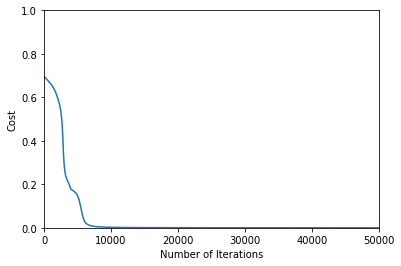

In [11]:
X = np.array([[0., 1., 0., 1.],
              [0., 0., 1., 1.]])
Y = np.array ([[0., 0., 0., 1.]]).reshape(1, 4)

layers_dims = [2, 10, 10, 5, 1]

model = L_layer_model(X, Y, layers_dims, learning_rate = 0.1, num_iterations = 50000, print_cost = False)
Y_pred = predict(X, model['parameters'])
print('Predicted Values : ' + str(Y_pred))
plt.plot(range(100, 50001, 100), model['costs'])
plt.axis([0, 50000, 0, 1])
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()